In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_excel('Monsoon_Streamflow_excel.xlsx')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3)
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,0.0,0.0,0.0
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,0.0,0.0
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,0.0
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,1.6
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,2019-09-26,2019,9,26,21.6,27.2,24.3,21.6,7.6,12.0,21.7,11.9,8.0,0,100.5,199.3,77.1,86.3
5242,2019-09-27,2019,9,27,5.3,4.7,1.8,2.4,2.8,5.9,11.6,3.2,4.9,0,216.0,100.5,199.3,77.1
5243,2019-09-28,2019,9,28,15.6,10.6,22.4,17.8,22.2,29.1,35.1,17.0,28.2,0,138.5,216.0,100.5,199.3
5244,2019-09-29,2019,9,29,25.8,25.2,43.5,39.5,50.8,49.7,33.6,41.9,52.3,0,118.3,138.5,216.0,100.5


In [3]:
part1 = df.drop(df.index[4270:5246])
part2 = df.drop(df.index[0:4270])
print(part1.shape, part2.shape)

(4270, 18) (976, 18)


In [4]:
part1

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3)
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600000,0.000000,0.000000,0.000000
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600000,1.600000,0.000000,0.000000
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600000,1.600000,1.600000,0.000000
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600000,1.600000,1.600000,1.600000
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600000,1.600000,1.600000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,2011-09-26,2011,9,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,47.799088,69.457275,97.324950,110.654434
4266,2011-09-27,2011,9,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,46.781605,47.799088,69.457275,97.324950
4267,2011-09-28,2011,9,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,45.136337,46.781605,47.799088,69.457275
4268,2011-09-29,2011,9,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,45.113705,45.136337,46.781605,47.799088


In [5]:
part2

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3)
4270,2012-06-01,2012,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4271,2012-06-02,2012,6,2,2.7,0.3,1.5,0.7,1.8,0.8,0.0,1.3,0.3,0,0.0,0.0,0.0,0.0
4272,2012-06-03,2012,6,3,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4273,2012-06-04,2012,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4274,2012-06-05,2012,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,2019-09-26,2019,9,26,21.6,27.2,24.3,21.6,7.6,12.0,21.7,11.9,8.0,0,100.5,199.3,77.1,86.3
5242,2019-09-27,2019,9,27,5.3,4.7,1.8,2.4,2.8,5.9,11.6,3.2,4.9,0,216.0,100.5,199.3,77.1
5243,2019-09-28,2019,9,28,15.6,10.6,22.4,17.8,22.2,29.1,35.1,17.0,28.2,0,138.5,216.0,100.5,199.3
5244,2019-09-29,2019,9,29,25.8,25.2,43.5,39.5,50.8,49.7,33.6,41.9,52.3,0,118.3,138.5,216.0,100.5


In [6]:
med1 = part1['Q'].median()
mean1 = part1['Q'].mean()
std1 = part1['Q'].std()
CV1 = (std1/mean1)*100
print(med1, mean1, std1, CV1)

43.265 119.51183984438643 301.67558115891444 252.42317543744548


In [7]:
med2 = part2['Q'].median()
mean2 = part2['Q'].mean()
std2 = part2['Q'].std()
CV2 = (std2/mean2)*100
print(med2, mean2, std2, CV2)

86.00450000000001 138.39090881400307 208.97513941542084 151.00351692630528


In [8]:
zero_count_1 = (part1['Q'] == 0).sum() 
perc_0values1 = (zero_count_1/12418)*100
print(zero_count_1, perc_0values1)

97 0.7811241745852795


In [9]:
zero_count_2 = (part2['Q'] == 0).sum() 
perc_0values2 = (zero_count_2/3288)*100
print(zero_count_2, perc_0values2)

152 4.622871046228711


# MLR STARTS HERE

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

[0.46235362] 64.45798321397797 0.3566167989375154 28068.148297964854


<function matplotlib.pyplot.show(close=None, block=None)>

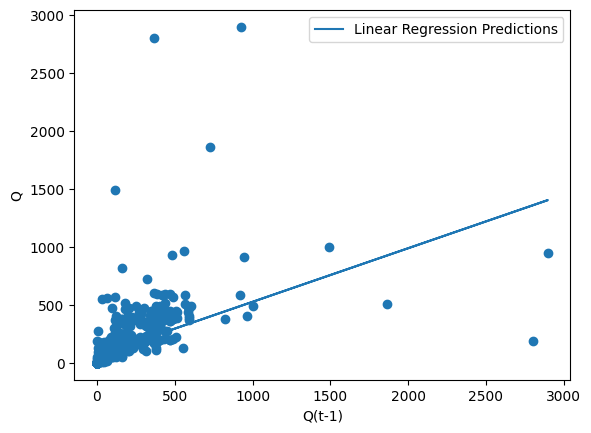

In [11]:
# independent variable = Q(t-1)
model1 = linear_model.LinearRegression()
model1.fit(part1[['Q(t-1)']], part1.Q)
Q_pred1 = model1.predict(part2[['Q(t-1)']])
R2_score1 = r2_score(part2[['Q']], Q_pred1)
MSE1 = mean_squared_error(part2[['Q']], Q_pred1)
print(model1.coef_, model1.intercept_, R2_score1, MSE1)
plt.scatter(part2[['Q(t-1)']], part2[['Q']])
plt.plot(part2[['Q(t-1)']], Q_pred1, label='Linear Regression Predictions')
plt.xlabel('Q(t-1)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.31048708] 82.66612774907168 0.23559018267618814 33348.039049874475


<function matplotlib.pyplot.show(close=None, block=None)>

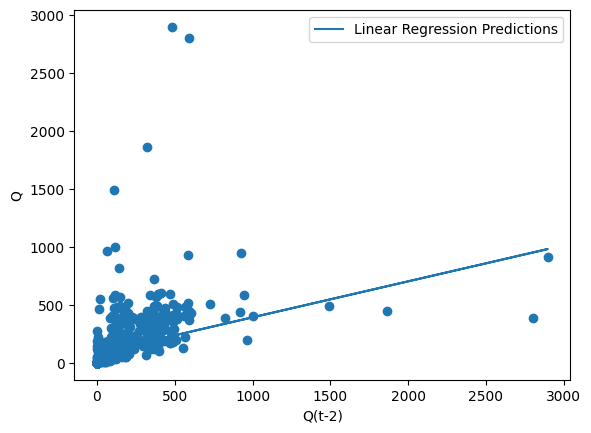

In [12]:
# independent variable = Q(t-2)
model2 = linear_model.LinearRegression()
model2.fit(part1[['Q(t-2)']], part1.Q)
Q = part2[['Q']]
Q_pred2 = model2.predict(part2[['Q(t-2)']])
R2_score2 = r2_score(part2[['Q']], Q_pred2)
MSE2 = mean_squared_error(part2[['Q']], Q_pred2)
print(model2.coef_, model2.intercept_, R2_score2, MSE2)
plt.scatter(part2[['Q(t-2)']], part2[['Q']])
plt.plot(part2[['Q(t-2)']], Q_pred2, label='Linear Regression Predictions')
plt.xlabel('Q(t-2)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.28012366] 86.41415604404668 0.18748945769155068 35446.474756431424


<function matplotlib.pyplot.show(close=None, block=None)>

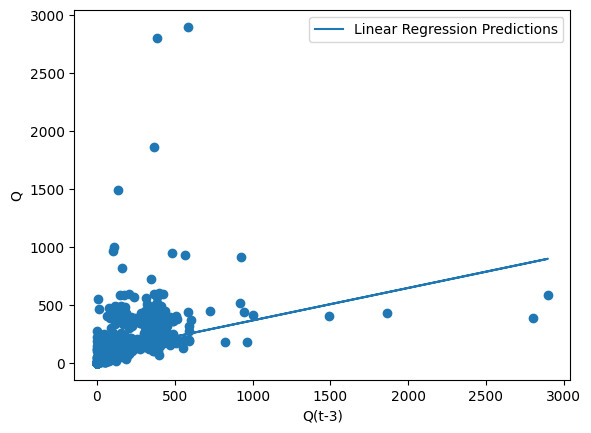

In [13]:
# independent variable = Q(t-3)
model3 = linear_model.LinearRegression()
model3.fit(part1[['Q(t-3)']], part1.Q)
Q = part2[['Q']]
Q_pred3 = model3.predict(part2[['Q(t-3)']])
R2_score3 = r2_score(part2[['Q']], Q_pred3)
MSE3 = mean_squared_error(part2[['Q']], Q_pred3)
print(model3.coef_, model3.intercept_, R2_score3, MSE3)
plt.scatter(part2[['Q(t-3)']], part2[['Q']])
plt.plot(part2[['Q(t-3)']], Q_pred3, label='Linear Regression Predictions')
plt.xlabel('Q(t-3)')
plt.ylabel('Q')
plt.legend()
plt.show

In [14]:
# independent variable = Q(t-1), Q(t-2)
model4 = linear_model.LinearRegression()
model4.fit(part1[['Q(t-1)', 'Q(t-2)']], part1.Q)
Q_pred4 = model4.predict(part2[['Q(t-1)', 'Q(t-2)']])
R2_score4 = r2_score(part2[['Q']], Q_pred4)
MSE4 = mean_squared_error(part2[['Q']], Q_pred4)
print(model4.coef_, model4.intercept_, R2_score4, MSE4)

[0.40546153 0.1228652 ] 56.65180236770441 0.39204252328652434 26522.6704506279


In [15]:
# independent variable = Q(t-1), Q(t-3)
model5 = linear_model.LinearRegression()
model5.fit(part1[['Q(t-1)', 'Q(t-3)']], part1.Q)
Q_pred5 = model5.predict(part2[['Q(t-1)', 'Q(t-3)']])
R2_score5 = r2_score(part2[['Q']], Q_pred5)
MSE5 = mean_squared_error(part2[['Q']], Q_pred5)
print(model5.coef_, model5.intercept_, R2_score5, MSE5)

[0.41535558 0.15096355] 52.2172607909677 0.3952410465037346 26383.13211041808


In [16]:
# independent variable = Q(t-2), Q(t-3)
model6 = linear_model.LinearRegression()
model6.fit(part1[['Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred6 = model6.predict(part2[['Q(t-2)', 'Q(t-3)']])
R2_score6 = r2_score(part2[['Q']], Q_pred6)
MSE6 = mean_squared_error(part2[['Q']], Q_pred6)
print(model6.coef_, model6.intercept_, R2_score6, MSE6)

[0.2300544  0.17356365] 71.70391748529427 0.2806502073970025 31382.256520760926


In [17]:
# independent variable = Q(t-1), Q(t-2), Q(t-3)
model7 = linear_model.LinearRegression()
model7.fit(part1[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred7 = model7.predict(part2[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']])
R2_score7 = r2_score(part2[['Q']], Q_pred7)
MSE7 = mean_squared_error(part2[['Q']], Q_pred7)
print(model7.coef_, model7.intercept_, R2_score7, MSE7)

[0.39000057 0.07182352 0.12557973] 49.71220867789458 0.408383789006034 25809.768607940372
